Tribhangin Dichpally - 20BCI7033

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as m 
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import sklearn.metrics as m 
import seaborn as sns


In [2]:
covid = pd.read_csv("covid_19_data.csv")
covid.head()


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [5]:
print("Size/Shape of the dataset: ",covid.shape)
print("Checking for null values:\n",covid.isnull().sum())
print("Checking Data-type of each column:\n",covid.dtypes)

Size/Shape of the dataset:  (306429, 8)
Checking for null values:
 SNo                    0
ObservationDate        0
Province/State     78100
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64
Checking Data-type of each column:
 SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


Drop Province/State due to high null values

In [6]:
covid.drop(columns=["SNo","Province/State"])

,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,01/22/2020,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,01/22/2020,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,01/22/2020,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,01/22/2020,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...
306424,05/29/2021,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,05/29/2021,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,05/29/2021,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,05/29/2021,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [7]:
le = preprocessing.LabelEncoder()
covid['Country/Region'] = le.fit_transform(covid['Country/Region'])
covid['ObservationDate'] = le.fit_transform(covid['ObservationDate'])
covid['Last Update'] = le.fit_transform(covid['Last Update'])
covid['Province/State'] = le.fit_transform(covid['Province/State'])
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,21,24,126,0,1.0,0.0,0.0
1,2,21,60,126,0,14.0,0.0,0.0
2,3,21,124,126,0,6.0,0.0,0.0
3,4,21,194,126,0,1.0,0.0,0.0
4,5,21,200,126,0,0.0,0.0,0.0


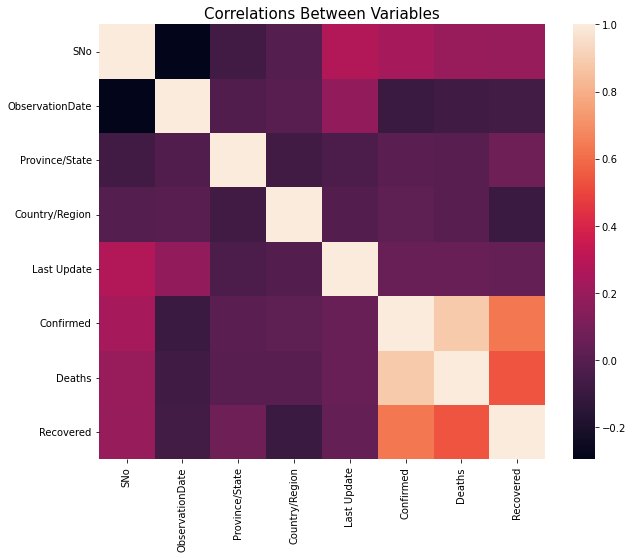

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(covid.corr(),xticklabels=True, yticklabels=True)
plt.title("Correlations Between Variables", size=15)
plt.show()

In [9]:
important_num_cols = list(covid.corr()["Deaths"][(covid.corr()["Deaths"]>0.50) | (covid.corr()["Deaths"]<-0.50)].index)
print(important_num_cols)

['Confirmed', 'Deaths', 'Recovered']


In [10]:
feature_list = ['Confirmed','Recovered']
X = covid[feature_list].values
y = covid['Deaths'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(214500, 2)
(91929, 2)
(214500,)
(91929,)


Linear Regression

In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print("Tribhangin Dichpally - 20BCI7033","\n")
print("MSE:", m.mean_squared_error(y_test, pred))
print("RMSE:",m.mean_squared_error(y_test, pred, squared=False))
print('R2 Score:', m.r2_score(y_test, pred))


Tribhangin Dichpally - 20BCI7033 

MSE: 8809004.165604299
RMSE: 2967.9966586241803
R2 Score: 0.7886200498262242


In [ ]:
Polynomial Regression

In [16]:
poly = PolynomialFeatures(degree = 8) 
linreg=LinearRegression(normalize=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
linreg.fit(X_train_poly, y_train)
prediction_poly=linreg.predict(X_test_poly)
print('R2 score:', m.r2_score(y_test, prediction_poly))
print("MSE:", m.mean_squared_error(y_test, prediction_poly))
print("RMSE:",m.mean_squared_error(y_test, prediction_poly, squared=False))

R2 score: 0.8258095168870617
MSE: 7259178.035045562
RMSE: 2694.286182840561


In [ ]:
SVM regression

In [14]:
X_train_svr,y_train_svr = X_train[:5000,:3],y_train[:5000]
model_nlinear = SVR()
model_nlinear.fit(X_train_svr, y_train_svr)
y_pred_rbf = model_nlinear.predict(X_test)
print('R2 score:', m.r2_score(y_test, y_pred_rbf))
print("MSE:", m.mean_squared_error(y_test, y_pred_rbf))
print("RMSE:",m.mean_squared_error(y_test, y_pred_rbf, squared=False))



R2 score: -0.0885021333219973
MSE: 45362011.95439691
RMSE: 6735.132660489837


In [ ]:
KNN Regressor

In [13]:
clf = KNeighborsRegressor(n_neighbors=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('R Squared Error:', m.r2_score(y_test, y_pred))
print("MSE:", m.mean_squared_error(y_test, y_pred))
print("RMSE:",m.mean_squared_error(y_test, y_pred, squared=False))



R Squared Error: 0.816703555451757
MSE: 7638657.981698437
RMSE: 2763.8122189646742


We consider MSE to be the measure of accuracy in regression models 

In [16]:
MLA_columns = pd.Series(["Linear Regression","Polynomial Regression","SVM Regressor","KNN Regressor"])
MLA_Test_Accuracy =pd.Series([(m.mean_squared_error(y_test, pred)), (m.mean_squared_error(y_test, prediction_poly)), m.mean_squared_error(y_test, y_pred_rbf),(m.mean_squared_error(y_test,y_pred))])
MLA_compare = pd.DataFrame(columns = MLA_columns)
frame = {'MLA used': MLA_columns, 'MSE': MLA_Test_Accuracy }
MLA_compare =  pd.DataFrame(frame)  
print(MLA_compare)

                MLA used           MSE
0      Linear Regression  8.809004e+06
1  Polynomial Regression  7.259178e+06
2          SVM Regressor  4.536201e+07
3          KNN Regressor  7.638658e+06


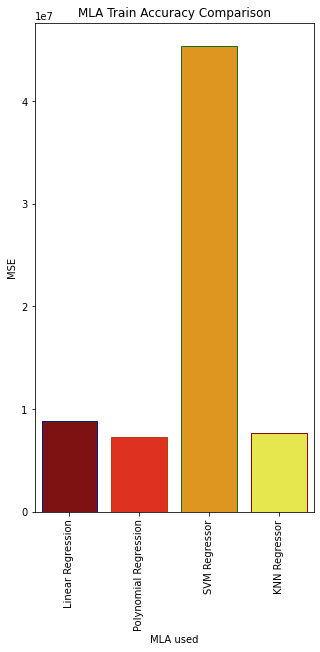

In [17]:
plt.subplots(figsize=(5,9))
sns.barplot(x="MLA used", y="MSE",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()